# Log Reg in Python

In [4]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
x = np.arange(10).reshape(-1,1)
y = np.array([0,0,0,0,1,1,1,1,1,1])

In [6]:
x

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [7]:
y

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [8]:
model = LogisticRegression(solver='liblinear', random_state=0)

In [9]:
model.fit(x,y)

LogisticRegression(random_state=0, solver='liblinear')

In [11]:
print(model.intercept_, model.coef_)

[-1.04608067] [[0.51491375]]


In [12]:
model.classes_

array([0, 1])

In [13]:
model.predict_proba(x)

array([[0.74002157, 0.25997843],
       [0.62975524, 0.37024476],
       [0.5040632 , 0.4959368 ],
       [0.37785549, 0.62214451],
       [0.26628093, 0.73371907],
       [0.17821501, 0.82178499],
       [0.11472079, 0.88527921],
       [0.07186982, 0.92813018],
       [0.04422513, 0.95577487],
       [0.02690569, 0.97309431]])

In [14]:
model.predict(x)

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [15]:
model.score(x,y)

0.9

In [16]:
y_pred = model.predict(x)
confusion_matrix(y, y_pred)

array([[3, 1],
       [0, 6]], dtype=int64)

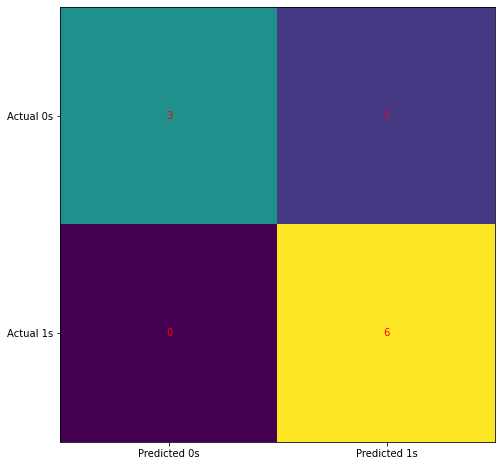

In [17]:
cm = confusion_matrix(y, model.predict(x))

fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s','Predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s','Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i,j], ha='center', va='center', color='red')

plt.show()

In [18]:
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



In [19]:
model = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
model.fit(x,y)

LogisticRegression(C=10.0, random_state=0, solver='liblinear')

In [20]:
print(model.predict(x))

[0 0 0 0 1 1 1 1 1 1]


In [21]:
model.score(x,y)

1.0

In [22]:
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



# Handwriting Recog

In [24]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [54]:
x, y = load_digits(return_X_y=True)

In [55]:
print(x)
print(y)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]


In [56]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [57]:
x[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [58]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [59]:
model = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr', random_state=0)
model.fit(x_train, y_train)

LogisticRegression(C=0.05, multi_class='ovr', random_state=0,
                   solver='liblinear')

In [60]:
x_test=scaler.transform(x_test)

In [61]:
y_pred = model.predict(x_test)

In [62]:
model.score(x_train, y_train)

0.964509394572025

In [63]:
model.score(x_test, y_test)

0.9416666666666667

In [35]:
confusion_matrix(y_test, y_pred)

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 32,  0,  0,  0,  0,  1,  0,  1,  1],
       [ 1,  1, 33,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 28,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 29,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 39,  0,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 39,  0,  0],
       [ 0,  2,  1,  2,  0,  0,  0,  1, 33,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  2,  1, 36]], dtype=int64)

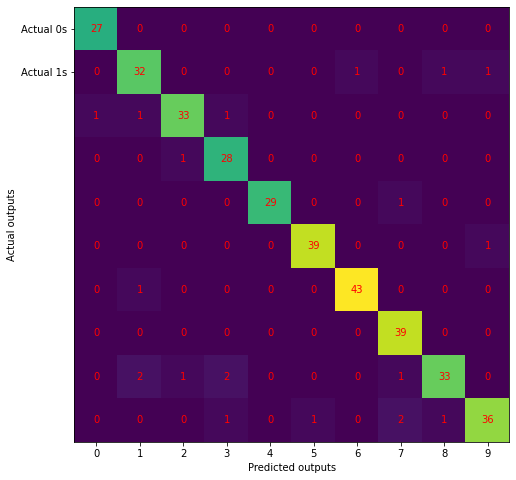

In [64]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=range(10))
ax.yaxis.set(ticks=range(10))
ax.set_xlabel('Predicted outputs', color='black')
ax.set_ylabel('Actual outputs', color='black')
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s','Actual 1s'))
ax.set_ylim(9.5, -0.5)
for i in range(10):
    for j in range(10):
        ax.text(j, i, cm[i,j], ha='center', va='center', color='red')

plt.show()

In [65]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       0.89      0.91      0.90        35
           2       0.94      0.92      0.93        36
           3       0.88      0.97      0.92        29
           4       1.00      0.97      0.98        30
           5       0.97      0.97      0.97        40
           6       0.98      0.98      0.98        44
           7       0.91      1.00      0.95        39
           8       0.94      0.85      0.89        39
           9       0.95      0.88      0.91        41

    accuracy                           0.94       360
   macro avg       0.94      0.94      0.94       360
weighted avg       0.94      0.94      0.94       360



In [67]:
weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny',
'Rainy','Sunny','Overcast','Overcast','Rainy']

temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']

play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

In [68]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

weather_encoded=le.fit_transform(weather)
print(weather_encoded)

[2 2 0 1 1 1 0 2 2 1 2 0 0 1]


In [69]:
temp_encoded = le.fit_transform(temp)

label=le.fit_transform(play)
print(temp_encoded)

[1 1 1 2 0 0 0 2 0 2 2 2 1 2]


In [70]:
#combining weather and temp into single listof tuples 
features=list(zip(weather_encoded,temp_encoded))
print(features)

[(2, 1), (2, 1), (0, 1), (1, 2), (1, 0), (1, 0), (0, 0), (2, 2), (2, 0), (1, 2), (2, 2), (0, 2), (0, 1), (1, 2)]


In [71]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)

model.fit(features,label)

predicted=model.predict([[0,2]]) #0:Overcast, 2:Mild

print(predicted)

[1]


In [72]:
from sklearn import datasets
wine = datasets.load_wine()

In [73]:
print(wine.feature_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [74]:
print(wine.target_names)

['class_0' 'class_1' 'class_2']


In [75]:
print(wine.data[0:5])

[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]]


In [76]:
print(wine.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [78]:
print(wine.data.shape)

(178, 13)


In [79]:
print(wine.target.shape)

(178,)


In [80]:
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.2, random_state=0)

In [81]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [82]:
from sklearn import metrics

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8055555555555556


In [83]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [84]:
from sklearn import metrics

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7777777777777778


In [85]:
error = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Mean')

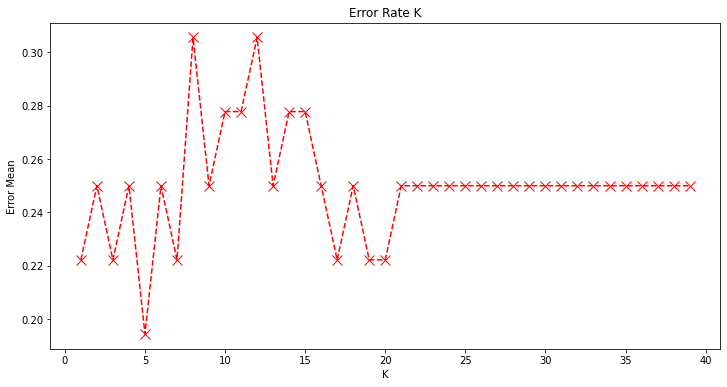

In [86]:
plt.figure(figsize=(12,6))
plt.plot(range(1,40), error, color='red', linestyle='dashed', marker='x', markerfacecolor='blue',markersize=10)
plt.title('Error Rate K')
plt.xlabel('K')
plt.ylabel('Error Mean')